# Librerias a usar

In [1]:
import pandas as pd
from pandas import DataFrame
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# Importamos datasets

In [2]:
df_com_dies = pd.read_csv("../DATASETS/community_dies.csv", index_col="CMPLNT_FR_DT", parse_dates=True)
df_com_dies

,BORO_NM,Agressions,New Years,agressions_lag_1,agressions_lag_2,agressions_lag_3,agressions_lag_4,agressions_community_1_month_avg,agressions_community_2_month_avg,month,...,"cos(2,freq=M)","sin(1,freq=W-SUN)","cos(1,freq=W-SUN)","sin(2,freq=W-SUN)","cos(2,freq=W-SUN)","sin(3,freq=W-SUN)","cos(3,freq=W-SUN)",Poverty,Unemployment,Bachelor_or_higher
CMPLNT_FR_DT,,,,,,,,,,,,,,,,,,,,,
2000-01-01,BRONX,15,1.0,0.0,0.0,1.0,0.0,0.700000,0.716667,1,...,1.000000,-0.974928,-0.222521,0.433884,-0.900969,0.781831,0.62349,0.307,0.143,0.146
2000-01-01,BROOKLYN,24,1.0,1.0,2.0,0.0,0.0,1.166667,1.100000,1,...,1.000000,-0.974928,-0.222521,0.433884,-0.900969,0.781831,0.62349,0.251,0.107,0.218
2000-01-01,MANHATTAN,11,1.0,0.0,0.0,0.0,0.0,0.666667,0.683333,1,...,1.000000,-0.974928,-0.222521,0.433884,-0.900969,0.781831,0.62349,0.199,0.084,0.494
2000-01-01,QUEENS,18,1.0,0.0,1.0,0.0,1.0,1.133333,0.966667,1,...,1.000000,-0.974928,-0.222521,0.433884,-0.900969,0.781831,0.62349,0.146,0.077,0.243
2000-01-01,STATEN ISLAND,5,1.0,0.0,1.0,0.0,0.0,0.333333,0.233333,1,...,1.000000,-0.974928,-0.222521,0.433884,-0.900969,0.781831,0.62349,0.100,0.059,0.232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31,BRONX,6,NaN,2.0,4.0,7.0,4.0,3.866667,3.666667,12,...,0.918958,0.000000,1.000000,0.000000,1.000000,0.000000,1.00000,0.291,0.118,0.164
2018-12-31,BROOKLYN,6,NaN,6.0,13.0,2.0,4.0,6.300000,6.150000,12,...,0.918958,0.000000,1.000000,0.000000,1.000000,0.000000,1.00000,0.226,0.074,0.279
2018-12-31,MANHATTAN,6,NaN,4.0,4.0,10.0,6.0,4.900000,5.000000,12,...,0.918958,0.000000,1.000000,0.000000,1.000000,0.000000,1.00000,0.183,0.067,0.552


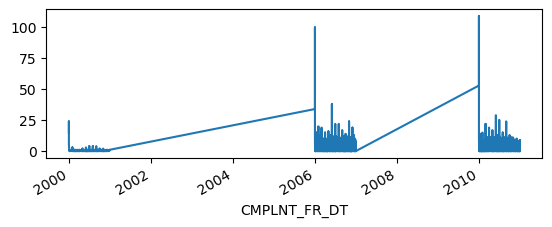

In [3]:
df_com_dies = df_com_dies[df_com_dies.index < '2011-01-01'].copy()
df_com_dies["Agressions"].plot(subplots=True, layout=(2,1));

# DIVIR DATA Y ENTRENAR MODELO

In [4]:
train_data, test_data = df_com_dies['2010-01-01':'2010-06-30'], df_com_dies.loc['2010-07-01':'2010-08-31']
train_arima = train_data['Agressions']
test_arima = test_data['Agressions']

In [5]:
history = [x for x in train_arima]
y = test_arima
y = y[y.notna()]
predictions = list()
model = ARIMA(history, order=(1,1,0))
model_fit = model.fit()

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  905
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -2657.812
Date:                Thu, 25 Jan 2024   AIC                           5319.623
Time:                        13:48:54   BIC                           5329.237
Sample:                             0   HQIC                          5323.295
                                - 905                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5162      0.008    -68.795      0.000      -0.531      -0.502
sigma2        20.9447      0.329     63.594      0.000      20.299      21.590
Ljung-Box (L1) (Q):                   0.20   Jarque-

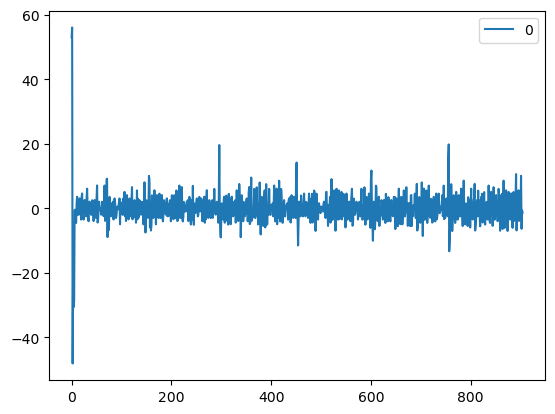

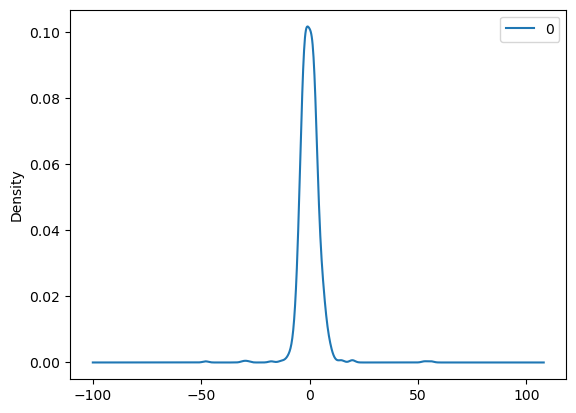

                0
count  905.000000
mean    -0.024599
std      4.997605
min    -48.091120
25%     -2.516230
50%     -0.064920
75%      2.032460
max     56.000781


In [6]:
print(model_fit.summary()) #resumen del entrenamiento del modelo
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde') 
pyplot.show()
print(residuals.describe()) # resumen de stats de residuales 

In [7]:
yhat = model_fit.forecast()[0]
predictions.append(yhat)
history.append(y[0])

/var/folders/1d/_xylp1812vd2jg38vsf_30w00000gn/T/ipykernel_2044/151777919.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  history.append(y[0])


In [8]:
# rolling forecasts
for i in range(1, len(y)):
    # predict
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    # invert transformed prediction
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)

/var/folders/1d/_xylp1812vd2jg38vsf_30w00000gn/T/ipykernel_2044/1295931633.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = y[i]


In [9]:
# report performance
mse = mean_squared_error(y, predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(y, predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(y, predictions))
print('RMSE: '+str(rmse))

MSE: 13.287164468626637
MAE: 2.889640464016875
RMSE: 3.6451563023588767


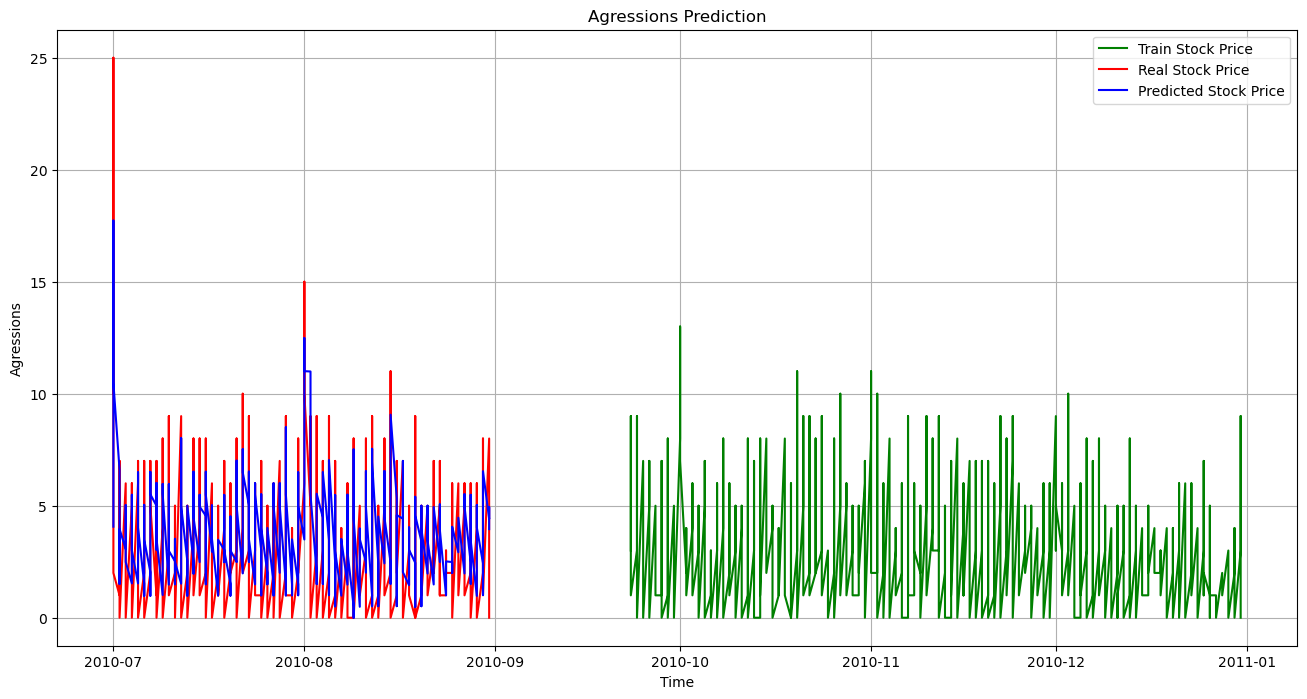

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(df_com_dies.index[-500:], df_com_dies['Agressions'].tail(500), color='green', label = 'Train Stock Price')
plt.plot(test_data.index, y, color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Stock Price')
plt.title('Agressions Prediction')
plt.xlabel('Time')
plt.ylabel('Agressions')
plt.legend()
plt.grid(True)
#plt.savefig('arima_model_community_2017.pdf')
plt.show()

In [11]:
df_pred_com_ver = pd.concat([y, pd.Series(predictions, index=y.index[-len(predictions):], name='Predictions')], axis=1)
df_pred_com_ver

,Agressions,Predictions
CMPLNT_FR_DT,,
2010-07-01,10,4.064920
2010-07-01,25,5.861372
2010-07-01,10,17.346261
2010-07-01,11,17.729227
2010-07-01,2,10.489283
...,...,...
2010-08-31,8,4.407967
2010-08-31,2,4.585286
2010-08-31,6,4.931054


In [12]:
pred_models = pd.read_csv("../DATASETS/pred_models_com_ver_2010.csv", index_col="CMPLNT_FR_DT", parse_dates=True)
pred_models

,Agressions,XGBoost
CMPLNT_FR_DT,,
2010-07-01,10,10.243906
2010-07-01,25,18.530033
2010-07-01,10,11.254179
2010-07-01,11,13.022561
2010-07-01,2,3.051909
...,...,...
2010-08-30,2,3.074260
2010-08-30,3,5.439735
2010-08-30,5,4.611109


In [13]:
pred_models_2010 = pred_models.merge(df_pred_com_ver[['Predictions']], left_index=True, right_index=True, how='left')
pred_models_2010 = pred_models_2010.rename(columns={'Predictions':'ARIMA'})

In [14]:
pred_models_2010

,Agressions,XGBoost,ARIMA
CMPLNT_FR_DT,,,
2010-07-01,10,10.243906,4.064920
2010-07-01,10,10.243906,5.861372
2010-07-01,10,10.243906,17.346261
2010-07-01,10,10.243906,17.729227
2010-07-01,10,10.243906,10.489283
...,...,...,...
2010-08-30,1,0.607202,2.434246
2010-08-30,1,0.607202,1.026468
2010-08-30,1,0.607202,2.513385


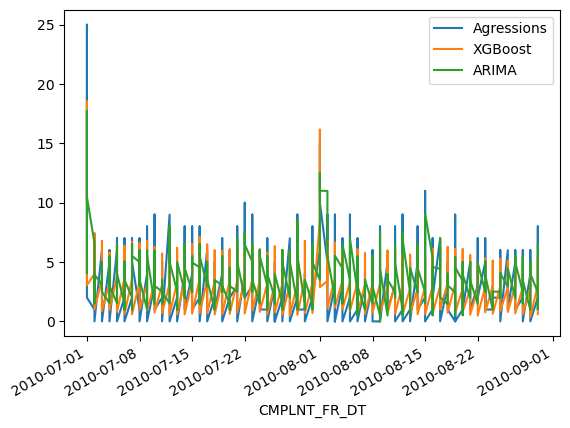

In [15]:
pred_models_2010.plot(y=["Agressions","XGBoost","ARIMA"])
plt.show()

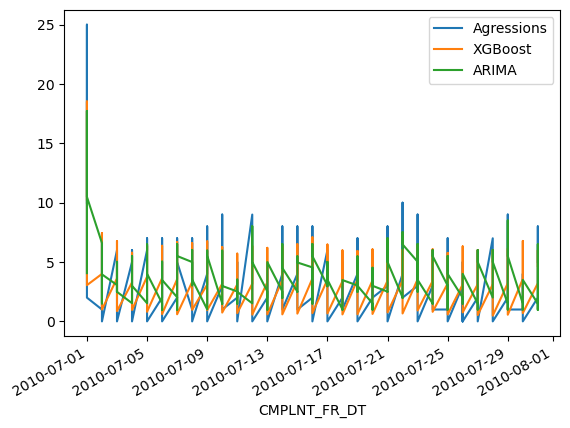

In [19]:
mitad_filas = len(pred_models_2010) // 2

# Realiza el gráfico con la primera mitad de las filas
pred_models_2010.iloc[:mitad_filas].plot(y=["Agressions", "XGBoost", "ARIMA"])
plt.show()

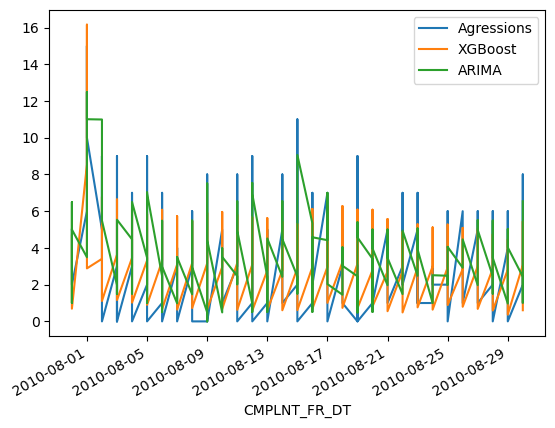

In [20]:
pred_models_2010.iloc[mitad_filas:].plot(y=["Agressions", "XGBoost", "ARIMA"])
plt.show()